# Load DPC data files and make top level statistics

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

## (1) load pickle file duopoly_feedback.data
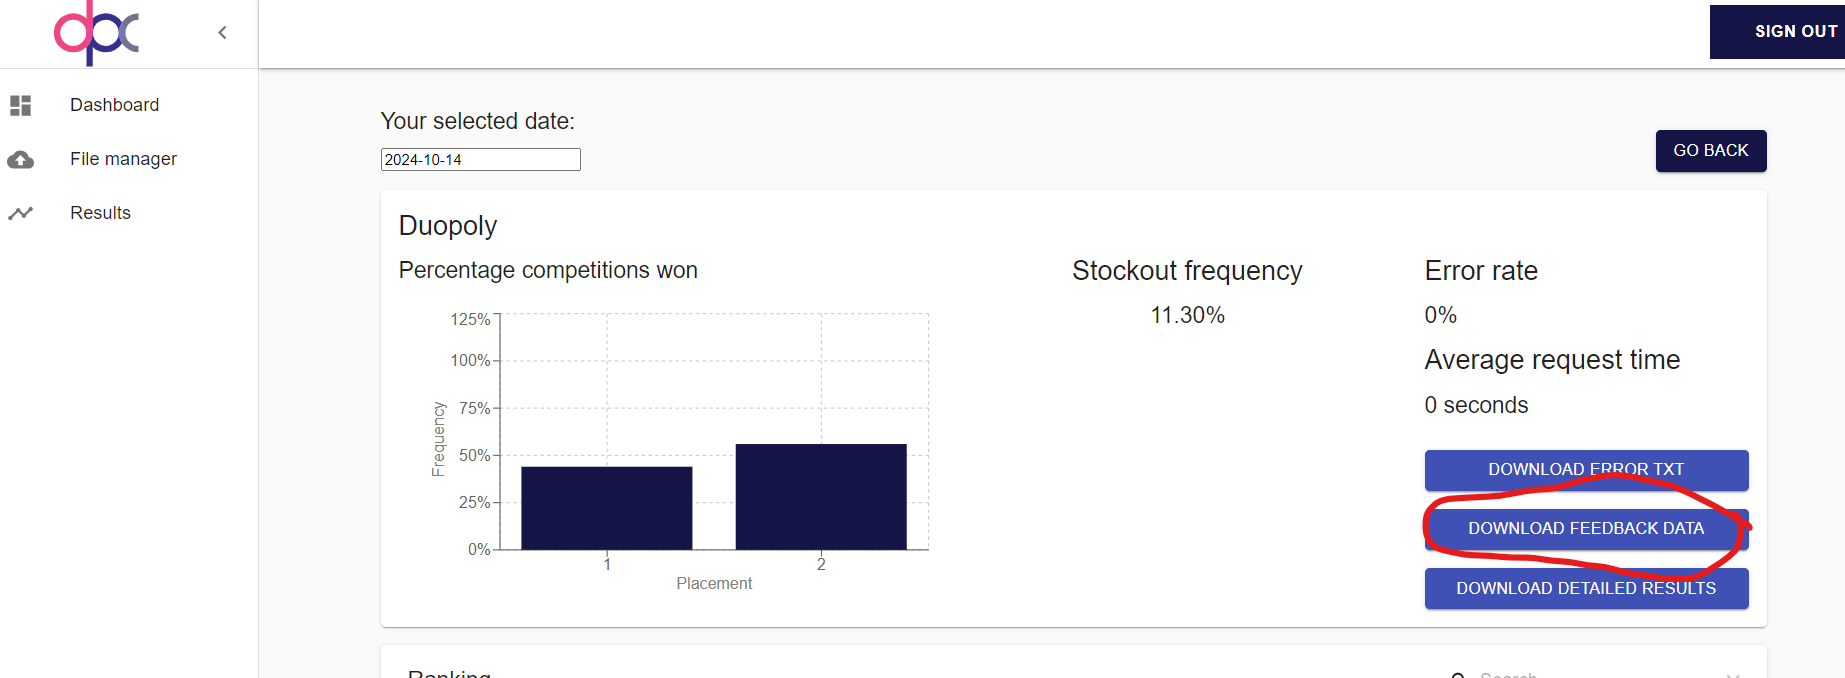

In [2]:
with open('duopoly_feedback.data', 'rb') as handle:
    feedback = pickle.load(handle)

In [3]:
feedback.keys()

dict_keys(['history', 'current_simulation', 'cumulative_revenue_current_selling_season', 'factor', 'last_base_price', 'price_today'])

In [5]:
feedback['history'].tail(10)

,simulation,day,season,demand,own_price,competitor_price,remaining_capacity,revenue,cumulative_revenue,factors,factor,price_today
39990,283697ce-3515-4190-98e7-7dc00aca034d,91.0,100.0,0.0,20.0,19.0,59.0,0.0,596.491452,NaN,1.0,17.147500
39991,283697ce-3515-4190-98e7-7dc00aca034d,92.0,100.0,1.0,20.0,19.0,58.0,20.0,616.491452,NaN,1.0,16.290125
39992,283697ce-3515-4190-98e7-7dc00aca034d,93.0,100.0,0.0,20.0,19.0,58.0,0.0,616.491452,NaN,1.0,15.475619
39993,283697ce-3515-4190-98e7-7dc00aca034d,94.0,100.0,0.0,20.0,19.0,58.0,0.0,616.491452,NaN,1.0,19.000000
39994,283697ce-3515-4190-98e7-7dc00aca034d,95.0,100.0,0.0,20.0,19.0,58.0,0.0,616.491452,NaN,1.0,18.050000
39995,283697ce-3515-4190-98e7-7dc00aca034d,96.0,100.0,1.0,20.0,19.0,57.0,20.0,636.491452,NaN,1.0,17.147500
39996,283697ce-3515-4190-98e7-7dc00aca034d,97.0,100.0,0.0,20.0,19.0,57.0,0.0,636.491452,NaN,1.0,16.290125
39997,283697ce-3515-4190-98e7-7dc00aca034d,98.0,100.0,0.0,20.0,19.0,57.0,0.0,636.491452,NaN,1.0,15.475619
39998,283697ce-3515-4190-98e7-7dc00aca034d,99.0,100.0,1.0,20.0,19.0,56.0,20.0,656.491452,NaN,1.0,19.000000
39999,283697ce-3515-4190-98e7-7dc00aca034d,100.0,100.0,0.0,20.0,19.0,56.0,0.0,656.491452,NaN,1.0,18.050000


In [ ]:
feedback['current_simulation']

'f0a08126-b469-493c-b9f0-9975c880851a'

In [ ]:
feedback['cumulative_revenue_current_selling_season']

786.3961490153454

## (2) load duopoly_competition_details.csv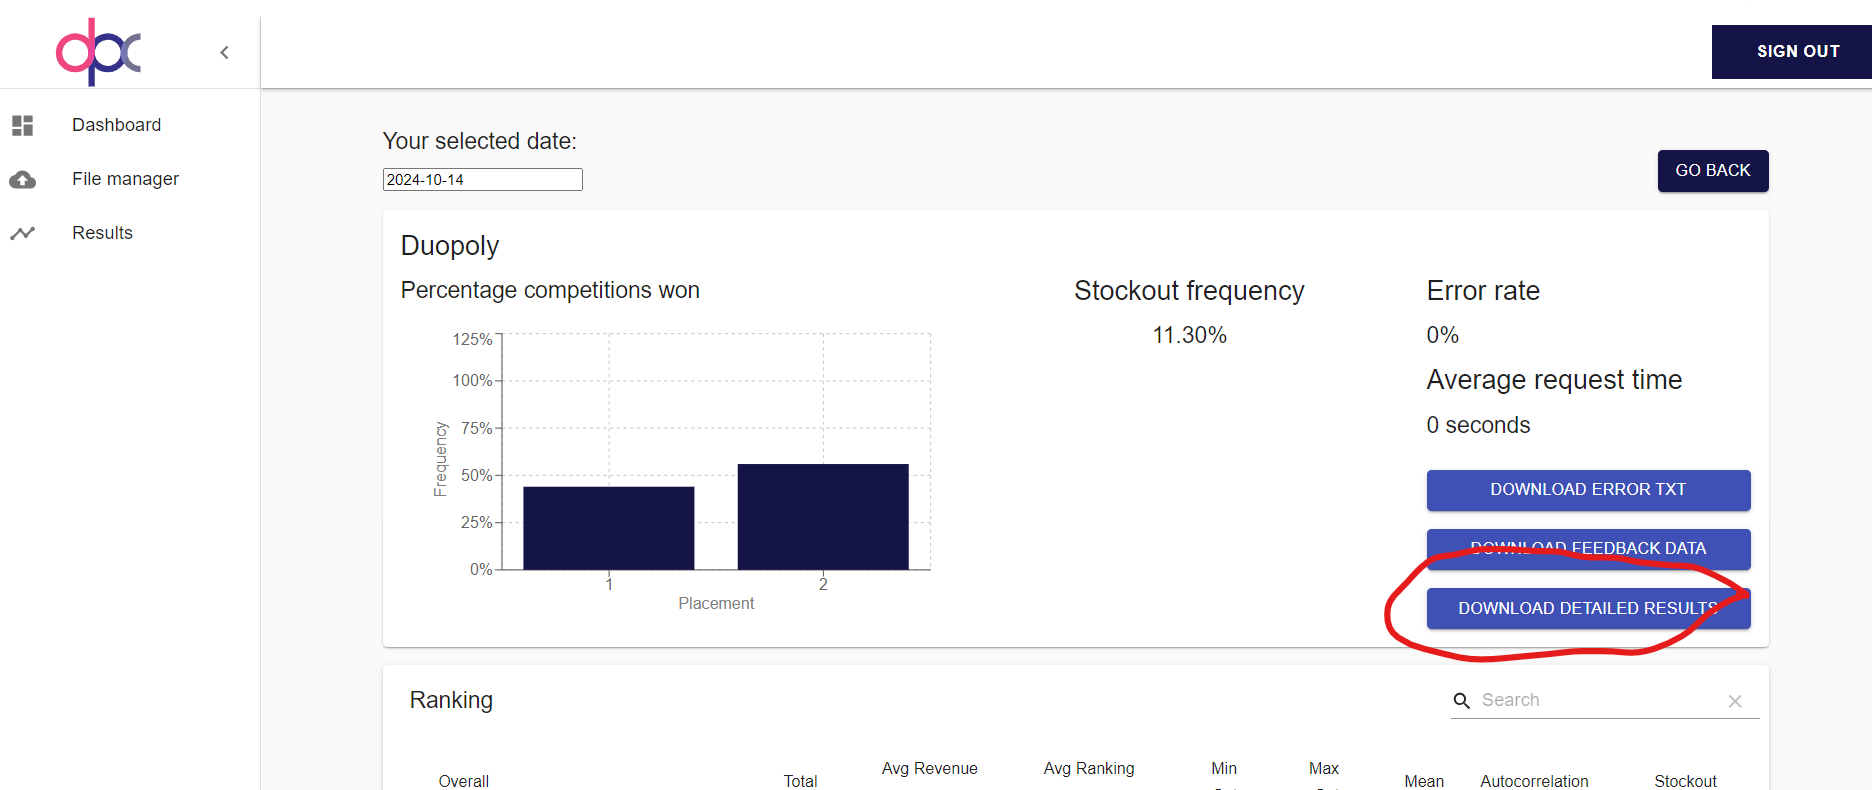

In [ ]:
df_comp_details = pd.read_csv('duopoly_competition_details_quentin.csv')
df_comp_details.head(10)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors
0,3JbhUV,1,1,NoisyMammoth,48.0,40.4,0,True,0.0,NaN
1,3JbhUV,1,2,NoisyMammoth,40.0,60.6,0,True,0.0,NaN
2,3JbhUV,1,3,NoisyMammoth,47.4,46.6,0,True,0.0,NaN
3,3JbhUV,1,4,NoisyMammoth,50.5,60.0,0,True,0.0,NaN
4,3JbhUV,1,5,NoisyMammoth,56.3,70.1,1,True,0.0,NaN
5,3JbhUV,1,6,NoisyMammoth,65.0,70.2,0,True,0.0,NaN
6,3JbhUV,1,7,NoisyMammoth,73.8,66.3,0,True,0.0,NaN
7,3JbhUV,1,8,NoisyMammoth,42.9,50.0,1,True,0.0,NaN
8,3JbhUV,1,9,NoisyMammoth,48.2,64.3,0,True,0.0,NaN
9,3JbhUV,1,10,NoisyMammoth,53.3,77.1,0,True,0.0,NaN


In [ ]:
df_comp_details.groupby('competitor_id').agg({
    'competition_id' : 'nunique',
    'selling_season' : ['max', 'count']
})

competition_id selling_season       
                         nunique            max  count
competitor_id                                         
IncredibleDogfish              1            100  10000
NoisyMammoth                   2            100  20000

### create unique selling_season_id

In [ ]:
df_comp_details['unique_selling_season_key'] = df_comp_details.apply(lambda r:
                                "%s_%s" % (r.competition_id,r.selling_season), axis=1)

df_comp_details.head(3)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key
0,3JbhUV,1,1,NoisyMammoth,48.0,40.4,0,True,0.0,NaN,3JbhUV_1
1,3JbhUV,1,2,NoisyMammoth,40.0,60.6,0,True,0.0,NaN,3JbhUV_1
2,3JbhUV,1,3,NoisyMammoth,47.4,46.6,0,True,0.0,NaN,3JbhUV_1


#### show revenue distribution over all selling seasons

In [ ]:
df_comp_details['revenue'] = df_comp_details['demand'] * df_comp_details['price']

In [ ]:
dfx_rev = df_comp_details.groupby('unique_selling_season_key').agg({
    'revenue' : 'sum'
}).reset_index()

dfx_rev.head()

,unique_selling_season_key,revenue
0,3JbhUV_1,3620.7
1,3JbhUV_10,3086.0
2,3JbhUV_100,3610.7
3,3JbhUV_11,3785.9
4,3JbhUV_12,3218.9


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

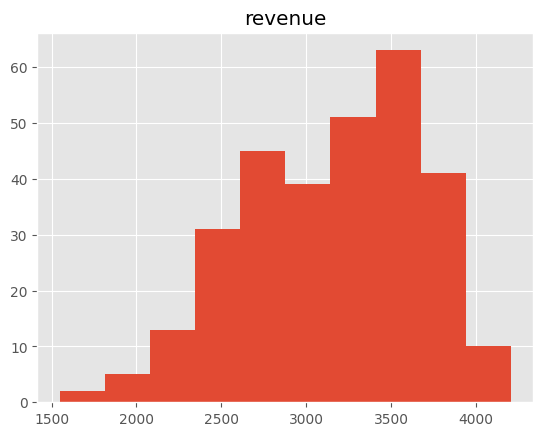

In [ ]:
dfx_rev.hist()

In [ ]:
dfx_rev_top = dfx_rev.sort_values('revenue', ascending=False)

dfx_rev_top.head(10)

,unique_selling_season_key,revenue
72,3JbhUV_74,4204.3
92,3JbhUV_92,4125.5
239,fRMRTd_44,4020.2
5,3JbhUV_13,4019.0
51,3JbhUV_55,4009.4
39,3JbhUV_44,4004.7
6,3JbhUV_14,4001.5
50,3JbhUV_54,3994.5
91,3JbhUV_91,3963.1
74,3JbhUV_76,3945.8


### visualize the results of one selling season

In [ ]:
id = dfx_rev_top['unique_selling_season_key'].values[1]

df_aux = df_comp_details[df_comp_details.unique_selling_season_key==id]
df_aux.head(10)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue
9100,3JbhUV,92,1,NoisyMammoth,48.0,40.2,0,True,0.0,NaN,3JbhUV_92,0.0
9101,3JbhUV,92,2,NoisyMammoth,44.8,43.7,1,True,0.0,NaN,3JbhUV_92,43.7
9102,3JbhUV,92,3,NoisyMammoth,44.8,67.7,0,True,0.0,NaN,3JbhUV_92,0.0
9103,3JbhUV,92,4,NoisyMammoth,54.1,33.7,0,True,0.0,NaN,3JbhUV_92,0.0
9104,3JbhUV,92,5,NoisyMammoth,52.2,62.3,0,True,0.0,NaN,3JbhUV_92,0.0
9105,3JbhUV,92,6,NoisyMammoth,53.8,64.6,0,True,0.0,NaN,3JbhUV_92,0.0
9106,3JbhUV,92,7,NoisyMammoth,54.5,45.1,0,True,0.0,NaN,3JbhUV_92,0.0
9107,3JbhUV,92,8,NoisyMammoth,54.6,65.1,0,True,0.0,NaN,3JbhUV_92,0.0
9108,3JbhUV,92,9,NoisyMammoth,54.9,78.7,0,True,0.0,NaN,3JbhUV_92,0.0
9109,3JbhUV,92,10,NoisyMammoth,57.3,71.6,0,True,0.0,NaN,3JbhUV_92,0.0


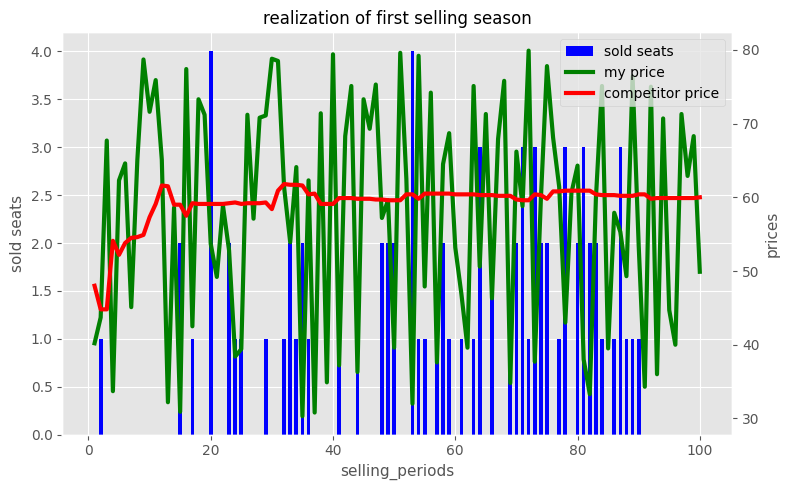

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(df_aux.selling_period, df_aux.demand, color='b', width=0.6, align='center', label = 'sold seats')
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("sold seats" , size=11)

ax_2 = ax.twinx()
ax_2.grid(False)
ax_2.plot(df_aux.selling_period, df_aux.price, color='g', linestyle='-', linewidth=3, label = 'my price')
ax_2.plot(df_aux.selling_period, df_aux.price_competitor, color='r', linestyle='-', linewidth=3, label = 'competitor price')
ax_2.tick_params(axis="both", labelsize=10)
ax_2.set_ylabel("prices" , size=11)

ax.tick_params(axis="both", labelsize=10)
ax.set_title("realization of first selling season", size=12)

# legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_2.get_legend_handles_labels()
ax_2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

# Plot the Capacity Utilization Curve

**capacity utilization = sold quantity / capacity**

In [ ]:
df_aux['cum_demand'] = df_aux['demand'].cumsum()
df_aux['cap_util'] = round(df_aux[ 'cum_demand'] / 80 ,2)
df_aux.tail(5)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue,cum_demand,cap_util
50695,DJzqdu,7,96,UncoveredElephant,17.9,80.0,1,False,0.0,NaN,DJzqdu_7,80.0,35,0.44
50696,DJzqdu,7,97,UncoveredElephant,17.9,80.0,1,False,0.0,NaN,DJzqdu_7,80.0,36,0.45
50697,DJzqdu,7,98,UncoveredElephant,17.9,80.0,2,False,0.0,NaN,DJzqdu_7,160.0,38,0.48
50698,DJzqdu,7,99,UncoveredElephant,17.9,80.0,1,False,0.0,NaN,DJzqdu_7,80.0,39,0.49
50699,DJzqdu,7,100,UncoveredElephant,17.9,80.0,0,False,0.0,NaN,DJzqdu_7,0.0,39,0.49


In [ ]:
df_aux.competitor_has_capacity.value_counts()


competitor_has_capacity
False    54
True     46
Name: count, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

# ax.plot(df_aux.selling_period, df_aux.cum_demand, color='b', 
#        width=0.6, align='center', label = 'sold seats')
ax.plot(df_aux.selling_period, df_aux.cap_util, color='g', 
        linestyle='-', linewidth=3, label = 'capacity utilization')
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("show capacity utilization (cumulative sales) over time", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

NameError: name 'plt' is not defined

<Axes: xlabel='selling_period'>

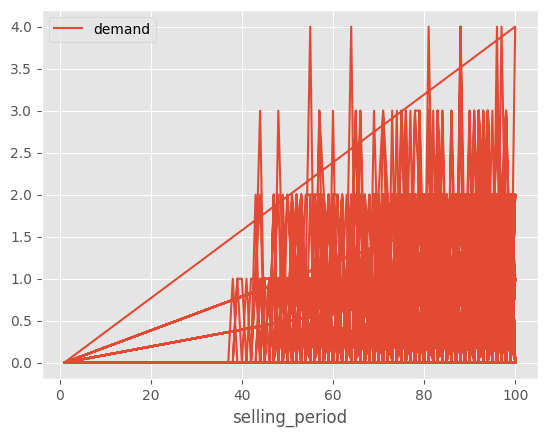

In [ ]:
df_comp_details.plot(x='selling_period', y ='demand')